In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rc
import load_data as ld
import jax.numpy as jnp
import cmasher as cm
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
file_name = '-test-rgbs'
spectra_dir_path = '../spec/spectra-reference-stars-APOGEE-giants-10K-ref/'
file_path = '../data/master-APOGEE-giants-test.fits'
spectra_data, label_data = ld.load_data(spectra_dir_path, file_path, file_name)

../spec/spectra-reference-stars-APOGEE-giants-10K-ref/spectra_data-test-rgbs.dat
File already exists. Loading spectra data


24it [00:00, 52.49it/s]

Loaded data successfully


In [3]:
test_ID = label_data['ids']
test_flux = spectra_data['fluxes']
test_flux_err = spectra_data['fluxes_err']
test_flux_ivar = spectra_data['fluxes_ivars']
test_label = label_data['labels']
test_label_err = label_data['labels_err']
test_label_ivar = label_data['labels_ivars']

In [4]:
l2reg = 1000
latent_dim = 'P49'
savepath = '../sav/paper/'
name = '_'+str(latent_dim)+'_L2regstrength'+str(l2reg)+'_omega1-train-highsnrgiants'
alphas = np.load(savepath+'alphas_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
betas = np.load(savepath+'betas_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
zetas = np.load(savepath+'zetas_train_giants-withscatters'+str(name)+'.npy', allow_pickle=True)
ln_noise_fluxes_updated = jnp.log(np.load(savepath+'noise_fluxes_train_giants-withscatters'+str(name)+'.npy', allow_pickle=True))


In [5]:
savepath = '../sav/paper/'
name = '_49_L2regstrength1000_omega1-train-highsnrgiants'
zetas_test_fromfluxes = np.load(savepath+'zetas_test_fromflux_giants-withscatters'+str(name)+'.npy', allow_pickle=True)

# Run PCA

In [6]:
# Number of components to be figured out
zetas_test = zetas_test_fromfluxes
n_comp = 2
pca2 = PCA(n_components=n_comp)
principalComponents2 = pca2.fit_transform(zetas_test)

n_comp = 3
pca3 = PCA(n_components=n_comp)
principalComponents3 = pca3.fit_transform(zetas_test)

n_comp = 4
pca4 = PCA(n_components=n_comp)
principalComponents4 = pca4.fit_transform(zetas_test)

n_comp = 5
pca5 = PCA(n_components=n_comp)
principalComponents5 = pca5.fit_transform(zetas_test)

n_comp = 6
pca6 = PCA(n_components=n_comp)
principalComponents6 = pca6.fit_transform(zetas_test)

n_comp = 7
pca7 = PCA(n_components=n_comp)
principalComponents7 = pca7.fit_transform(zetas_test)



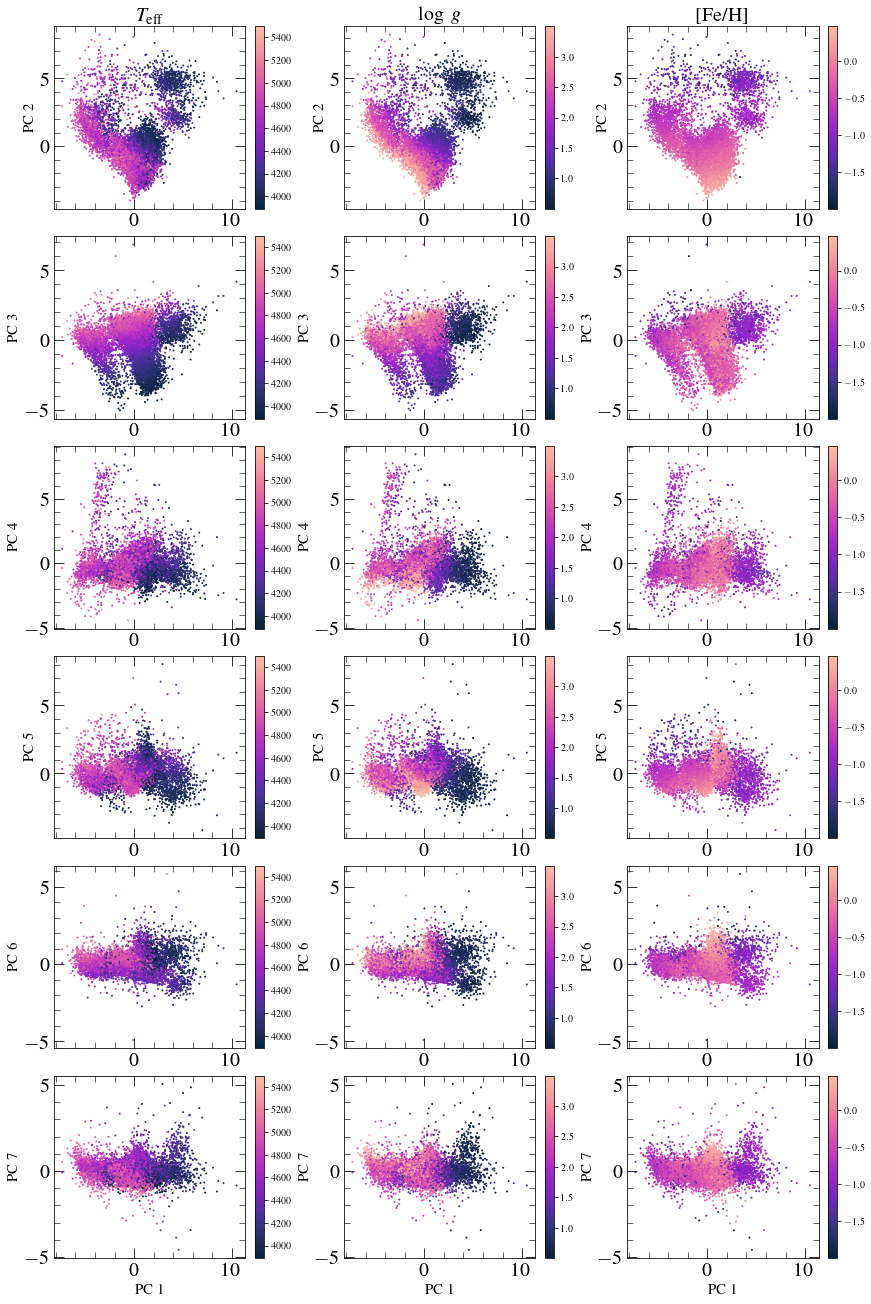

In [7]:
plt.figure(figsize=(12,18), constrained_layout=True, facecolor='white')

plt.subplot(6,3,1)
plt.title('$T_{\mathrm{eff}}$', fontsize=20)
plt.scatter(principalComponents7[:,0], principalComponents7[:,1], s=1, c=test_label[:,0], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 2', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,2)
plt.title('$\log~g$', fontsize=20)
plt.scatter(principalComponents7[:,0], principalComponents7[:,1], s=1, c=test_label[:,1], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 2', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,3)
plt.title('[Fe/H]', fontsize=20)
plt.scatter(principalComponents7[:,0], principalComponents7[:,1], s=1, c=test_label[:,2], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 2', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,4)
plt.scatter(principalComponents7[:,0], principalComponents7[:,2], s=1, c=test_label[:,0], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 3', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,5)
plt.scatter(principalComponents7[:,0], principalComponents7[:,2], s=1, c=test_label[:,1], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 3', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,6)
plt.scatter(principalComponents7[:,0], principalComponents7[:,2], s=1, c=test_label[:,2], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 3', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()


plt.subplot(6,3,7)
plt.scatter(principalComponents7[:,0], principalComponents7[:,3], s=1, c=test_label[:,0], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 4', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,8)
plt.scatter(principalComponents7[:,0], principalComponents7[:,3], s=1, c=test_label[:,1], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 4', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,9)
plt.scatter(principalComponents7[:,0], principalComponents7[:,3], s=1, c=test_label[:,2], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 4', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()



plt.subplot(6,3,10)
plt.scatter(principalComponents7[:,0], principalComponents7[:,4], s=1, c=test_label[:,0], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 5', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,11)
plt.scatter(principalComponents7[:,0], principalComponents7[:,4], s=1, c=test_label[:,1], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 5', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,12)
plt.scatter(principalComponents7[:,0], principalComponents7[:,4], s=1, c=test_label[:,2], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 5', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()



plt.subplot(6,3,13)
plt.scatter(principalComponents7[:,0], principalComponents7[:,5], s=1, c=test_label[:,0], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 6', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,14)
plt.scatter(principalComponents7[:,0], principalComponents7[:,5], s=1, c=test_label[:,1], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 6', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,15)
plt.scatter(principalComponents7[:,0], principalComponents7[:,5], s=1, c=test_label[:,2], cmap=cm.bubblegum)
plt.colorbar()
# plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 6', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()



plt.subplot(6,3,16)
plt.scatter(principalComponents7[:,0], principalComponents7[:,6], s=1, c=test_label[:,0], cmap=cm.bubblegum)
plt.colorbar()
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 7', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,17)
plt.scatter(principalComponents7[:,0], principalComponents7[:,6], s=1, c=test_label[:,1], cmap=cm.bubblegum)
plt.colorbar()
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 7', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()

plt.subplot(6,3,18)
plt.scatter(principalComponents7[:,0], principalComponents7[:,6], s=1, c=test_label[:,2], cmap=cm.bubblegum)
plt.colorbar()
plt.xlabel('PC 1', fontsize=15)
plt.ylabel('PC 7', fontsize=15)
plt.tick_params(which='major',labelsize=20,direction='in',top=True,right=True,length=10)
plt.tick_params(which='minor', length=6, direction='in',top=True,right=True)
plt.minorticks_on()



# run T-sne

In [8]:
# perplexity of 25
zetas_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=25).fit_transform(zetas_test_fromfluxes)

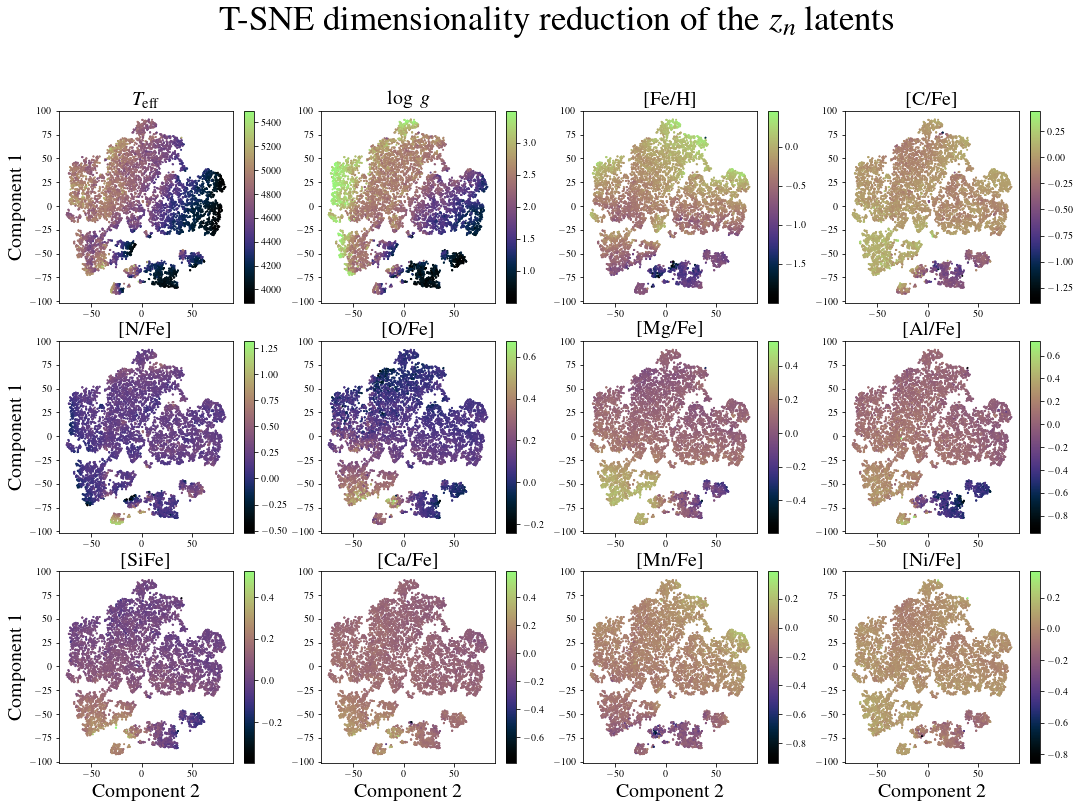

In [9]:
fig = plt.figure(figsize=(18,12), facecolor='white', rasterized=True)
fig.suptitle('T-SNE dimensionality reduction of the $z_n$ latents',fontsize=35,x=0.51,y=1.)

plt.subplot(3,4,1)
plt.title('$T_{\mathrm{eff}}$', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,0], cmap=cm.lilac)
plt.colorbar()
plt.ylabel('Component 1', fontsize=20)

plt.subplot(3,4,2)
plt.title('$\log~g$', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,1], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,3)
plt.title('[Fe/H]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,2], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,4)
plt.title('[C/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,3], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,5)
plt.title('[N/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,4], cmap=cm.lilac)
plt.colorbar()
plt.ylabel('Component 1', fontsize=20)

plt.subplot(3,4,6)
plt.title('[O/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,5], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,7)
plt.title('[Mg/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,6], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,8)
plt.title('[Al/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,7], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,9)
plt.title('[SiFe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,8], cmap=cm.lilac)
plt.colorbar()
plt.ylabel('Component 1', fontsize=20)
plt.xlabel('Component 2', fontsize=20)

plt.subplot(3,4,10)
plt.title('[Ca/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,9], cmap=cm.lilac)
plt.colorbar()
plt.xlabel('Component 2', fontsize=20)

plt.subplot(3,4,11)
plt.title('[Mn/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,10], cmap=cm.lilac)
plt.colorbar()
plt.xlabel('Component 2', fontsize=20)

plt.subplot(3,4,12)
plt.title('[Ni/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,11], cmap=cm.lilac)
plt.colorbar()
plt.xlabel('Component 2', fontsize=20)

plt.savefig('../plots/paper/tsne-perp25-v2.pdf',dpi=200, bbox_inches = 'tight')

In [10]:
# perplexity of 50
zetas_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=50).fit_transform(zetas_test)

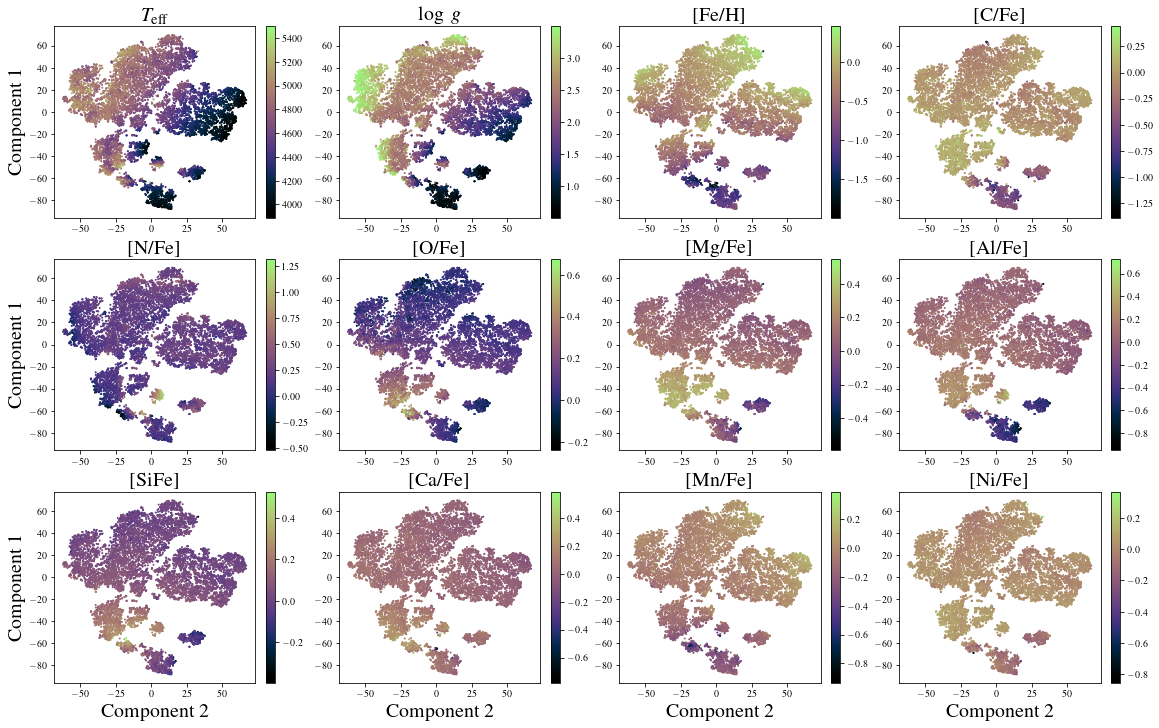

In [11]:
plt.figure(figsize=(16,10), constrained_layout=True, facecolor='white')

plt.subplot(3,4,1)
plt.title('$T_{\mathrm{eff}}$', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,0], cmap=cm.lilac)
plt.colorbar()
plt.ylabel('Component 1', fontsize=20)

plt.subplot(3,4,2)
plt.title('$\log~g$', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,1], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,3)
plt.title('[Fe/H]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,2], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,4)
plt.title('[C/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,3], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,5)
plt.title('[N/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,4], cmap=cm.lilac)
plt.colorbar()
plt.ylabel('Component 1', fontsize=20)

plt.subplot(3,4,6)
plt.title('[O/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,5], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,7)
plt.title('[Mg/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,6], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,8)
plt.title('[Al/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,7], cmap=cm.lilac)
plt.colorbar()

plt.subplot(3,4,9)
plt.title('[SiFe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,8], cmap=cm.lilac)
plt.colorbar()
plt.ylabel('Component 1', fontsize=20)
plt.xlabel('Component 2', fontsize=20)

plt.subplot(3,4,10)
plt.title('[Ca/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,9], cmap=cm.lilac)
plt.colorbar()
plt.xlabel('Component 2', fontsize=20)

plt.subplot(3,4,11)
plt.title('[Mn/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,10], cmap=cm.lilac)
plt.colorbar()
plt.xlabel('Component 2', fontsize=20)

plt.subplot(3,4,12)
plt.title('[Ni/Fe]', fontsize=20)
plt.scatter(zetas_embedded[:,0], zetas_embedded[:,1], s=1, c=test_label[:,11], cmap=cm.lilac)
plt.colorbar()
plt.xlabel('Component 2', fontsize=20)

plt.savefig('../plots/paper/tsne-perp50.pdf',dpi=200, bbox_inches = 'tight')